In [2]:
from datasets.datasetgetter import get_dataset
from PIL import Image
from IPython.display import display
import torch
from torchvision import transforms

In [3]:
args = type("Piyo", (object,), {"img_size": 80, "att_to_use": [0,1,2,3], "data_dir": "../font-images", "val_num": 10})

In [4]:
train_dataset, val_dataset = get_dataset(args)

USE CLASSES [0, 1, 2, 3]
LABEL MAP: {0: 0, 1: 1, 2: 2, 3: 3}
MINIMUM TRAIN DATA FONT : 8
MAXIMUM TAIN DATA FONT : 8


In [26]:
train_loader = torch.utils.data.DataLoader(train_dataset['TRAIN'], batch_size=8, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_dataset)
it = iter(train_loader)
imgs, y_org = next(it)


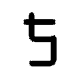

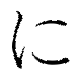

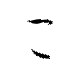

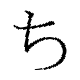

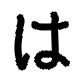

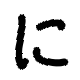

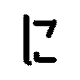

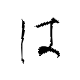

In [30]:
for i in range(imgs.shape[0]):
    display(transforms.ToPILImage()(imgs[i]).convert("RGB"))

8

In [31]:
import json

In [32]:
with open('joyokanji.json', 'r') as f:
    data = json.load(f)

In [37]:
character = ''.join(data['jp'])


In [39]:
with open('joyokanji.txt', 'w') as f:
    f.write(character)